In [2]:
import pandas as pd


df = pd.read_csv("/Users/malar/Desktop/SQL_MALAR/Numpy/Day66,67/stock_data.csv")

print(df.head())


         Date    Open    High    Low   Close   Volume
0  2024-01-02  100.50  101.20   99.9  100.95  2450000
1  2024-01-03  101.10  101.85  100.6  101.40  2680000
2  2024-01-04  101.35  101.90  100.8  101.10  2310000
3  2024-01-05  101.00  101.70  100.7  101.55  2550000
4  2024-01-08  101.60  102.30  101.1  102.05  2775000


/var/folders/vv/89zs5c496pdd8ktzhzpzpd240000gn/T/ipykernel_3237/1320614354.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


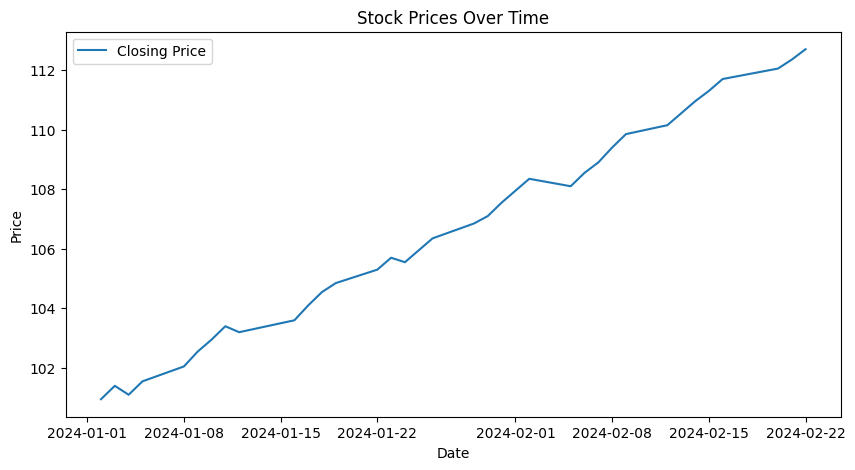

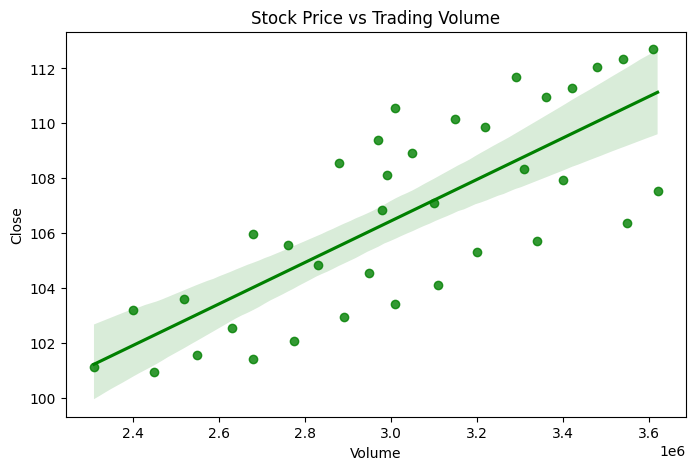

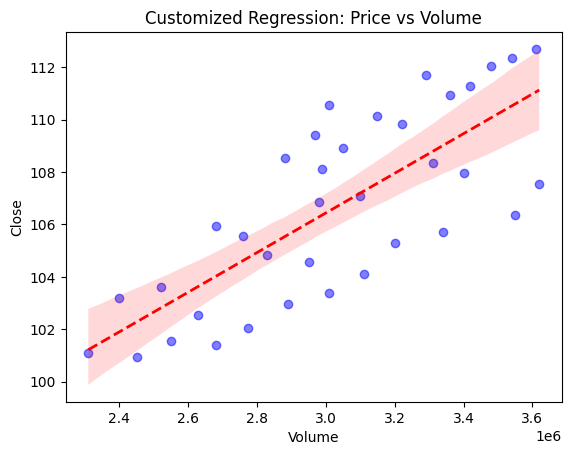

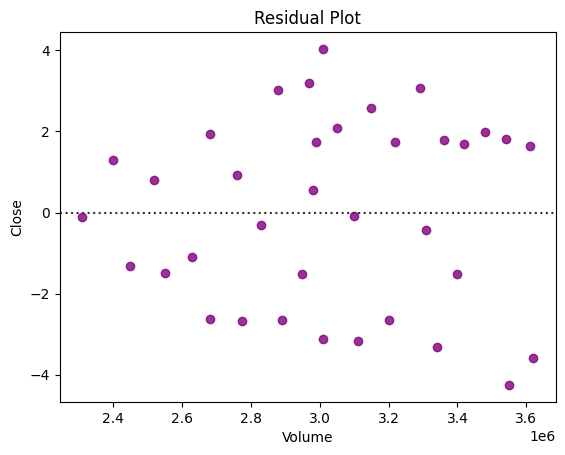

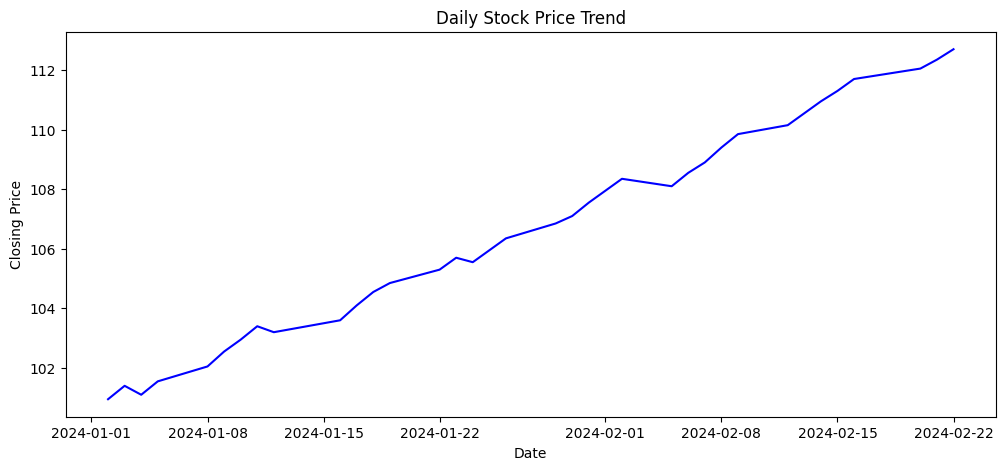

R-squared: 0.9950089739620356
MSE: 0.06162495138086315
        Date  Predicted_Close
0 2024-02-23       112.832660
1 2024-02-24       113.063496
2 2024-02-25       113.294332
3 2024-02-26       113.525168
4 2024-02-27       113.756004
5 2024-02-28       113.986839
6 2024-02-29       114.217675
7 2024-03-01       114.448511
8 2024-03-02       114.679347
9 2024-03-03       114.910183


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


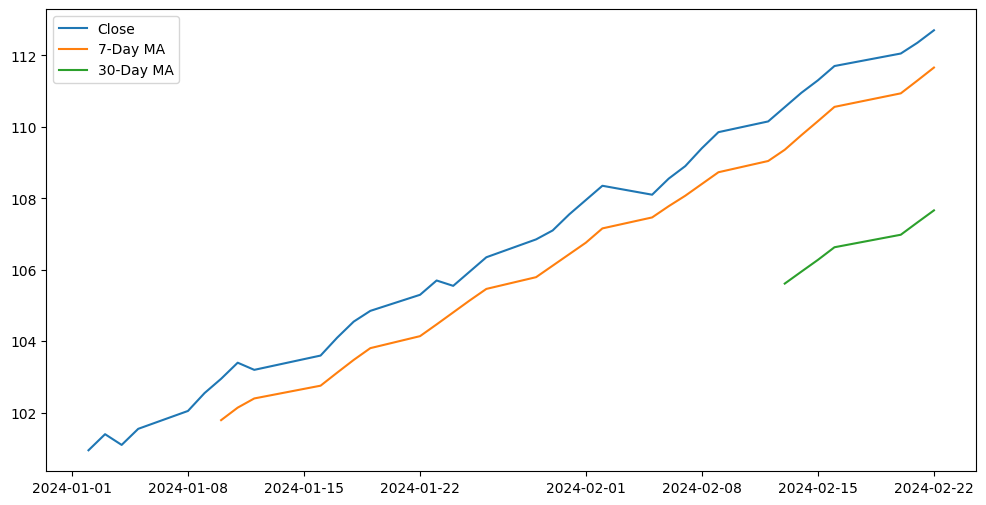

ValueError: x must have 2 complete cycles requires 60 observations. x only has 36 observation(s)

In [3]:
import seaborn as sns
df['Date'] = pd.to_datetime(df['Date'])

df.fillna(method='ffill', inplace=True)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Close'], label='Closing Price')
plt.title("Stock Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()



plt.figure(figsize=(8,5))
sns.regplot(x='Volume', y='Close', data=df, color='green', marker='o')
plt.title("Stock Price vs Trading Volume")
plt.show()
sns.regplot(
    x='Volume', y='Close', data=df,
    scatter_kws={'color':'blue', 'alpha':0.5},
    line_kws={'color':'red', 'lw':2, 'ls':'--'}
)
plt.title("Customized Regression: Price vs Volume")
plt.show()
sns.residplot(x='Volume', y='Close', data=df, color='purple')
plt.title("Residual Plot")
plt.show()
plt.figure(figsize=(12,5))
plt.plot(df['Date'], df['Close'], color='blue')
plt.title("Daily Stock Price Trend")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()
from sklearn.linear_model import LinearRegression
import numpy as np

# Convert dates to numeric for regression
df['Date_ordinal'] = df['Date'].map(pd.Timestamp.toordinal)

X = df[['Date_ordinal']]
y = df['Close']

model = LinearRegression()
model.fit(X, y)
from sklearn.metrics import r2_score, mean_squared_error

y_pred = model.predict(X)
print("R-squared:", r2_score(y, y_pred))
print("MSE:", mean_squared_error(y, y_pred))

# Predict for next 10 days
future_dates = pd.date_range(df['Date'].max(), periods=11, freq='D')[1:]
future_ordinals = future_dates.map(pd.Timestamp.toordinal).values.reshape(-1, 1)

future_preds = model.predict(future_ordinals)

forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted_Close': future_preds
})

print(forecast_df)
df['MA_7'] = df['Close'].rolling(window=7).mean()
df['MA_30'] = df['Close'].rolling(window=30).mean()

plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label='Close')
plt.plot(df['Date'], df['MA_7'], label='7-Day MA')
plt.plot(df['Date'], df['MA_30'], label='30-Day MA')
plt.legend()
plt.show()
from statsmodels.tsa.seasonal import seasonal_decompose

df.set_index('Date', inplace=True)
result = seasonal_decompose(df['Close'], model='multiplicative', period=30)
result.plot()
plt.show()
plt.figure(figsize=(10,5))
plt.plot(df.index, df['Close'], label='Historical')
plt.plot(forecast_df['Date'], forecast_df['Predicted_Close'], label='Forecast', linestyle='--', color='red')
plt.title("Stock Price Forecast")
plt.legend()
plt.show()
